## What is t-SNE?
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique developed by Laurens van der Maaten and Geoffrey Hinton in 2008.

#### The algorithm has two steps:

We initially construct a probability distribution in such a way that objects with a higher similarity have a higher probability to be grouped together than objects with lower probability. This is done over pairs of higher-dimensional objects.

We then construct a similar probability distribution over the lower-dimensional map so that the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the two distributions, with respect to their location on the map, is minimized.

Usually, the algorithm uses Euclidean distance as the base metric but it can be changed to fit the use of the programmer. These t-SNE clusters are dependent on chosen parameters and sometimes may show a cluster in non-clustered data. However, t-SNE is able to recover well-
separated clusters when the correct parameters are chosen.

Maaten and Hinton proposed the t-distributed SNE (t-SNE) in which the joint distribution of two samples, zn and zm , in low-dimensional space is modeled by a Student’s t-distribution:


![img](https://i.imgur.com/ihkO2Iu.png)

In above **ν** means the degree of freedom. t-SNE can alleviate the crowding problem in SNE.

## Now implementing t-SNE with scikit-learn's built-in function

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

train_df_org = pd.read_csv('kaggle/input/digit-recognizer/train.csv',  nrows=1000)
test_df_org = pd.read_csv('kaggle/input/digit-recognizer/test.csv',  nrows=1000)

train_df_for_tsne = StandardScaler().fit_transform(train_df_org)
train_df_org_label = train_df_org['label']


train_df_org.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
test_df_org.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
tsne = TSNE(n_components=2, random_state=0)
mnist_tsne = tsne.fit_transform(train_df_for_tsne)

mnist_tsne_1 = np.vstack((mnist_tsne.T, train_df_org_label)).T
tsne_df = pd.DataFrame(data=mnist_tsne_1, columns=('Dim_1', 'Dim_2', 'Label'))

tsne_df.head()

,Dim_1,Dim_2,Label
0,3.193196,-1.728171,1.0
1,-42.094837,17.451714,0.0
2,18.940496,10.338684,1.0
3,5.413895,-30.402338,4.0
4,-45.575104,18.657940,0.0


/home/paul/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



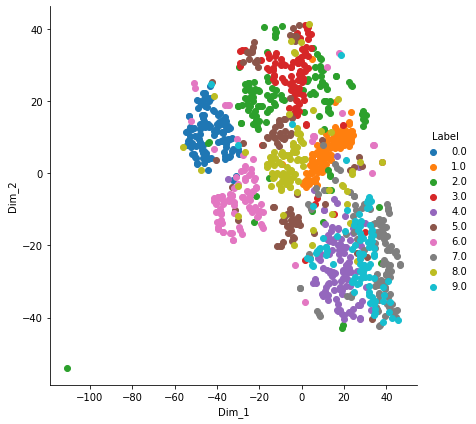

In [76]:
sns.FacetGrid(tsne_df, hue='Label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## Now will implement the same t-sne graph in a slightly different way

Below code is from - https://www.kaggle.com/subinium/dimension-reduction-3-t-sne
This produces a better looking color graph
But it super-SLOW, never ran in my local JupyterLab
Also in Kaggle it took more than 1 hour to run

In [77]:

import plotly.graph_objects as go
plt.rcParams['image.cmap'] = 'gray'

color = ['#6388b4', '#ffae34', '#ef6f6a', '#8cc2ca', '#55ad89', '#c3bc3f', '#bb7693', '#baa094', '#a9b5ae', '#767676']

mnist_df_without_label = train_df_org.drop(['label'], axis=1)
mnist_tsne_2 = tsne.fit_transform(mnist_df_without_label, train_df_org_label)

fig = go.Figure()

for idx in range(10):
    fig.add_trace(go.Scatter(
        x = mnist_tsne_2[:, 0][train_df_org_label==idx],
        y = mnist_tsne_2[:, 1][train_df_org_label == idx],
        name=str(idx),
        opacity=0.6,
        mode='markers',
        marker=dict(color=color[idx])
    ))

fig.update_layout(
    width=800,
    height=800,
    title='T-SNE on MNIST',
    yaxis = dict(
        scaleanchor = 'x',
        scaleratio = 1
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.show()

---

### The main motivations for dimensionality reduction are:

• To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better)
• To visualize the data and gain insights on the most important features
• To save space (compression)

### The main drawbacks are:
• Some information is lost, possibly degrading the performance of subsequent training algorithms.
• It can be computationally intensive.
• Transformed features are often hard to interpret.

---

## Data preparation for dimensionality reduction

There is no best technique for dimensionality reduction and no mapping of techniques to problems.

Instead, the best approach is to use systematic controlled experiments to discover what dimensionality reduction techniques, when paired with your model of choice, result in the best performance on your dataset.

Typically, linear algebra and manifold learning methods assume that all input features have the same scale or distribution. This suggests that it is good practice to either normalize or standardize data prior to using these methods if the input variables have differing scales or units.

---

## Strategies and common questions around implementations of various Dimensionality Reduction techniques (mainly t-SNE and Principal Component Analysis).

Think of PCA as an exploratory technique to investigate and study your system before doing other things. Dimensionality reduction, by nature, loses some information, just like image compression for instance. Consequently, it will often reduce the prediction quality of your model, but depending on the data it could also leave it unchanged or even improve it in some cases (very noisy data). In general, its main benefit will be to speed up training.

Besides speed of training, feature reduction also help with multicollinearity in some cases. Which is mainly an issue if you are interested in parameters estimation, like in causal analysis. For instance, if you use a multiple linear regression model to estimate the effect of some regressors on a dependent variable, multicollinearity will prevent proper parameters estimation because you won't be able to identify the effect of each regressor.

However, in many other ML applications, we don't really care about parameters identification, we care about how a set of variables can be used to predict another variable. If some variables are highly correlated, then there will be some redundant information in your data, but this shouldn't be problematic in terms of prediction quality.

In my experience, in couple of Kaggle Challenges, after doing some PCA, the accuracy has actually went down. After googling found out that some infer that PCA assumed that the variance could translate to high differentiable information which classifier could use. But at the same time, it threw some information away(not just noise), and these information could play a huge role in classification, although the variance is low.

Indeed, the curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional space arise in high-dimensional space. In Machine Learning, one common manifestation is the fact that randomly sampled high-dimensional vectors are generally very sparse, increasing the risk of overfitting and making it very difficult to identify patterns in the data without having plenty of training data.

Indeed, it often make any sense to chain two different dimensionality reduction algorithms. A common example is using PCA to quickly get rid of a large number of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE. This two-step approach will likely yield the same performance as using LLE only, but in a fraction of the time.


#### Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation?

Once a dataset’s dimensionality has been reduced using one of the available algorithms, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction. Moreover, while some algorithms (such as PCA) have a simple reverse transformation procedure that can reconstruct a dataset relatively similar to the original, other algorithms (such as T-SNE) do not.

#### Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

PCA (Principal component analysis) can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions—as in a [Swiss roll dataset](http://people.cs.uchicago.edu/~dinoj/manifold/swissroll.html)—then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.

#### If I perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have ?

It depends on the dataset. Let’s look at two extreme examples. First, suppose the dataset is composed of points that are almost perfectly aligned. In this case, PCA can reduce the dataset down to just one dimension while still preserving 95% of the variance. Now imagine that the dataset is composed of perfectly random points, scattered all around the 1,000 dimensions. In this case roughly 950 dimensions are required to preserve 95% of the variance. So the answer is, it depends on the dataset, and it could be any number between 1
and 950. Plotting the explained variance as a function of the number of dimensions is one way to get a rough idea of the dataset’s intrinsic dimensionality.

#### In what cases would we use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

Regular PCA is the default, but it works only if the dataset fits in memory. Incremental PCA is useful for large datasets that don’t fit in memory, but it is slower than regular PCA, so if the dataset fits in memory we should prefer regular PCA. Incremental PCA is also useful for online tasks, when we need to apply PCA on the fly, every time a new instance arrives. Randomized PCA is useful when we want to considerably reduce dimensionality and the dataset fits in memory; in this case, it is much faster than regular PCA. Finally, Kernel PCA is useful for nonlinear datasets.

#### How to evaluate the performance of a dimensionality reduction algorithm on our dataset?

Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if we are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then we can simply measure the performance
of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.